## Predicting Bankruptcy in Tiawanese companies from 1998-2009

This notebook consists of initial data exploration of the Predicting Bankruptcy dataset from Kaggle found at the following URL: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

The first part of the notebook is just getting the Kaggle API setup and the data downloaded into IBM Watson Studio.

In [1]:
# The code was removed by Watson Studio for sharing.

     |████████████████████████████████| 59 kB 4.5 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 7.6 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73269 sha256=3b1f366423d8b2dbf2404b9a04163500ea17873e305456cbee11d7cd940a32d1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ea/c5/fe/7e7fb5b3d1f150fac96188949b3d83d375a4c9df16ba557e52
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6767 sha256=4f9ec74611487ca462c26f56016b399f6fd0530b951e2567321d41b91b24b315
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/48/1b/6f/5c1cfab22eacbe0095fc619786da6571b55253653c71324b5c
Successfully built kaggle python-slugify
  0%|                                               | 0.00/4.63M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.63M/4.63M [00:00<00:00, 64.2MB/s]
Archive:  company-bankruptcy-prediction.zip
  inflating: data.csv                


## Save dataset to Cloud Object Storage

In [3]:
# Install pyspark and ibmos2spark

! pip install pyspark
! pip install ibmos2spark

# Define SparkContext and SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

# Save data to project folder
from project_lib import Project

project = Project(sc, "939d834e-ff85-4a5d-9952-9bf94243d5ae", "p-dd6b8c4af5c50be232dc2d685e8091eb69302d20")
project.save_data(file_name = "data.csv", data = df_pd.to_csv(index=False))

"""

 
For the line: project = Project(sc, "939d834e-ff85-4a5d-9952-9bf94243d5ae", "p-dd6b8c4af5c50be232dc2d685e8091eb69302d20")

the Project() function is in the form Project(sc, <my_project_id>, <my_token_id>)

See: https://www.ibm.com/support/pages/how-do-you-save-dataframe-watson-studio-project-notebook-asset-cloud-object-storage 
to learn how to find values for <my_project_id> and <my_project_token>


Final output of this cell should be something like:

{'file_name': 'data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmcapstoneproject-donotdelete-pr-iiaol8yd9vtgm6',
 'asset_id': '1238f15e-8bb8-4a76-8cac-7beaf0917b86'}
 
 """

     |████████████████████████████████| 204.2 MB 49 kB/s  eta 0:00:013     |█████████████████████▌          | 137.1 MB 9.2 MB/s eta 0:00:08MB 9.2 MB/s eta 0:00:07MB/s eta 0:00:04
     |████████████████████████████████| 198 kB 60.7 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612244 sha256=73627ab8395304be91a02d4133242c01e6a10ed03b5f6c520dc743f9c8c9e0e6
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [2]:
# Import the rest of the Libraries needed for Initial Data Exploration
import numpy as np
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

Let's start by taking a look at the data. 

We can immediately identify the "Class" column, titled "Bankrupt?" A 1 signifies the company is solvent, and a 0 signifies bankruptcy.

In [6]:
df_pd

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## General overview of Data

Next, we want to obtain some general information on the dataset.

We can see that the shape is 6819x96, signifying that we have nearly 6819 companies and 96 financial data points per company.

Furthermore, we can see that all of the features are numerical (no text inputs, like "Male/Female" or "Yes/No") and no Nan (missing) values. This is good news, as it should ease our feature engineering later on.

Finally, it appears we have some data points that have already been engineered (int64):
#85 "One if total liabilities exceeds total assets zero otherwise" is a binary classifier that we can assume was previously engineered.
#94 "One if net income was negative for the last two year zero otherwise" is another binary classifier that we can assume was previously engineered. 

While we will leave these two data points in for now, we may elect to drop them in our final model so our model can work over continuous-only data.

In [4]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

## Statistical overview

Pandas offers a handy command to get some statistical readouts for our columns. We can use these to visualize our data and identify which features might be problematic.

At first glance, the main takeaway is that mean of the Class column ("Bankrupt?") is ~0.03. Since that column consists of only 1's and 0's, such a low mean value implies that it is heavily skewed towards 0's, i.e. there are many more Solvent companies in the data than Bankrupt ones. 

In [5]:
df_pd.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Exploring the "Bankrupt?" column

Our plot shows that the data is heavily skewed, with over 90% of the dataset consisting of financially solvent companies. 

This is not surprising, as bankruptcy is typically rare. It is, however, a consideration we will have to take into account during our feature engineering and modeling stages. 

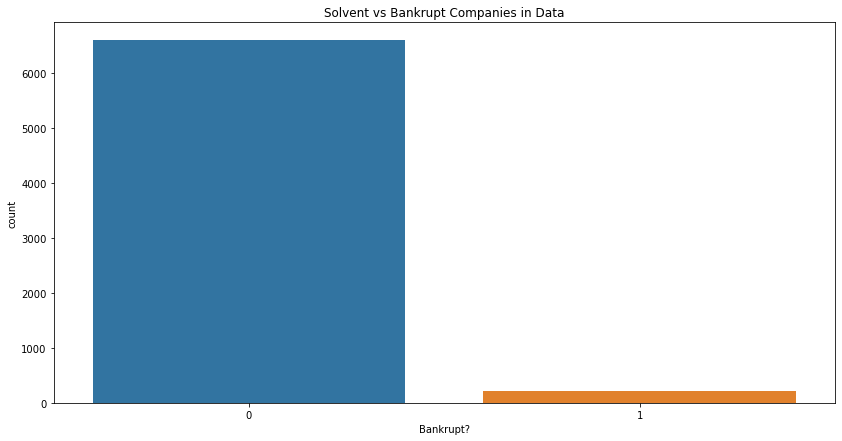

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [9]:
# Plot the data
plt.figure(figsize = (14, 7))

sns.countplot(df_pd['Bankrupt?'])
plt.title('Solvent vs Bankrupt Companies in Data')
plt.show()

print(df_pd['Bankrupt?'].value_counts())

## Correlation Matrix
Correlation matrices are always a useful exercise, but in this case they get particularly crowded and it's hard to gain insights from a plot of all the variables. 

At this point, we could go line by line and select features that show an interesting correlation. However, with such a large number of features, and such a skewed Class variable, I have elected to go with another method of feature selection that I will describe in the ETL and Feature Selection notebook. 

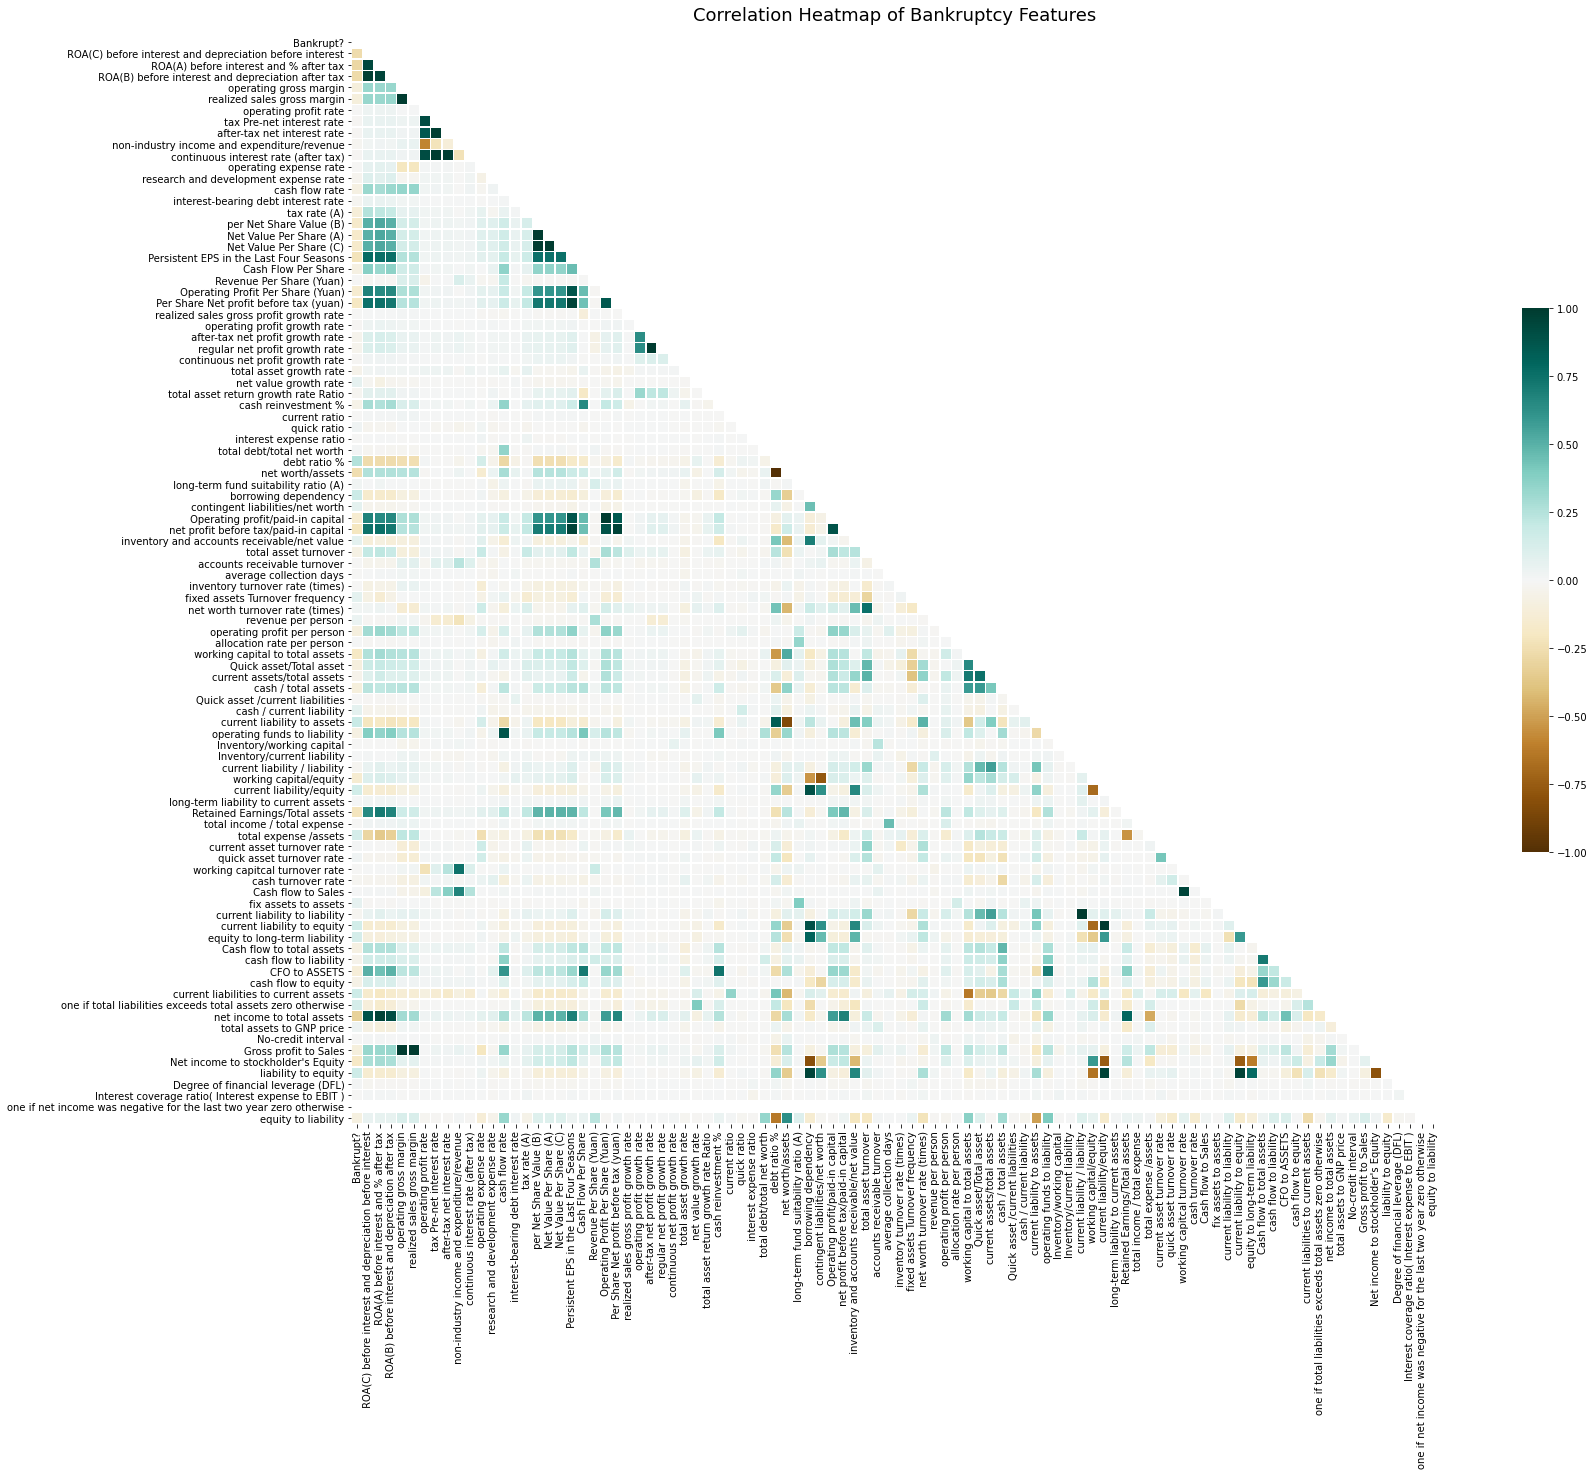

In [23]:
# Plot correlation matrix

plt.figure(figsize = (30, 20))
mask = np.triu(np.ones_like(df_pd.corr('pearson'), dtype=np.bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(df_pd.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG', center=0, square=True, linewidths=0.5, cbar_kws={"shrink" : 0.5})

heatmap.set_title('Correlation Heatmap of Bankruptcy Features', fontdict={'fontsize':18}, pad=16);

# Summary of Findings

## The good news:
1) We have no missing values in our data, so feature engineering is pretty much done at this point.

2) All data points are numerical, so again, we don't have to spend much time on feature engineering. 

## The bad news:
1) Our data's classification variable is heavily skewed, so we will need to address that in our choice of model.

2) There are a large number of features to choose from, and since we cannot glean much useful information from our correlation matrix, 
    feature selection will be a challenge.
    
3) In the future, not every company will have 96 data points to choose from. For example, we will not always know if Feature Number #94 "One if net income
    was negative for the last two year zero otherwise" will be available.
    To achieve our goal of predicting company bankruptcy and deploy the model, we will need to slim our features down to a lower number for 
    which we are likely to have financial data. 